# Section 1: Business understanding
## Project start business in Seattle with AirBNB

Novadays, AirBNB service is full of good offers for travelers. I have a customer who owns several properties in Seattle, and she is about to start this business as well. So, she asked me to complete preliminary analysis of the market in Seattle. So I do. She asked me questions:

### Q1: What is the price should I set for my property?

### Q2: What kind of amenities shall I include in my property and how they affect price?

### Q3: How 'cleaning fee' depends on object size and price?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy import stats

In [46]:
listings = pd.read_csv("listings.csv")
listings.shape

(3818, 92)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff409a8af28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff408418240>]], dtype=object)

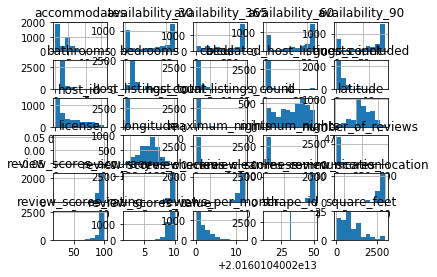

In [47]:
listings.hist()

# Section 2: Data understanding

In [48]:
listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms        ...          review_scores_rating  \
count  3802.000000  3812.000000        ...                   3171.000000   
mean      1.259469     1.307712        ...                     94.539262   
std       0.590369     0.883395        ...                      6.606083   
min       0.000000     0.000000        ...                     20.000000   
25%       1.000000     1.000000        ...                     93.000000   
50%       1.000000     1.000000        ...                     96.000000   
75%       1.000000     2.000000        ...                     99.000000   
max       8.000000     7.000000        ...                    100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             3160.000000                3165.000000   
mean                 9.636392                   9.556398   
std                  0.698031                   0.797274   
min                  2.000000                   3.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            3160.000000                  3167.000000   
mean                9.786709                     9.809599   
std                 0.595499                     0.568211   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  license  \
count             3163.000000          3162.000000      0.0   
mean                 9.608916             9.452245      NaN   
std                  0.629053             0.750259      NaN   
min                  4.000000             2.000000      NaN   
25%                  9.000000             9.000000      NaN   
50%                 10.000000            10.000000      NaN   
75%                 10.000000            10.000000      NaN   
max                 10.000000            10.000000      NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3818.000000        3191.000000  
mean                         2.946307           2.078919  
std                          5.893029           1.822348  
min                          1.000000           0.020000  
25%                          1.000000       

In [49]:
# convert price from string to int. This action require drop ',' and '$'

listings.price = listings.price[listings.price.notna()].str.replace(',', '').str.replace('$', '').astype(float)

"""
listings.review_scores_rating = listings.review_scores_rating.fillna(listings.review_scores_rating[listings.review_scores_rating.notna()].mean())
listings.review_scores_accuracy = listings.review_scores_accuracy.fillna(listings.review_scores_accuracy[listings.review_scores_accuracy.notna()].mean())
listings.review_scores_cleanliness = listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness[listings.review_scores_cleanliness.notna()].mean())
listings.review_scores_location = listings.review_scores_location.fillna(listings.review_scores_location[listings.review_scores_location.notna()].mean())
listings.review_scores_value = listings.review_scores_value.fillna(listings.review_scores_value[listings.review_scores_value.notna()].mean())
listings.reviews_per_month = listings.reviews_per_month.fillna(listings.reviews_per_month[listings.reviews_per_month.notna()].mean())
"""

'\nlistings.review_scores_rating = listings.review_scores_rating.fillna(listings.review_scores_rating[listings.review_scores_rating.notna()].mean())\nlistings.review_scores_accuracy = listings.review_scores_accuracy.fillna(listings.review_scores_accuracy[listings.review_scores_accuracy.notna()].mean())\nlistings.review_scores_cleanliness = listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness[listings.review_scores_cleanliness.notna()].mean())\nlistings.review_scores_location = listings.review_scores_location.fillna(listings.review_scores_location[listings.review_scores_location.notna()].mean())\nlistings.review_scores_value = listings.review_scores_value.fillna(listings.review_scores_value[listings.review_scores_value.notna()].mean())\nlistings.reviews_per_month = listings.reviews_per_month.fillna(listings.reviews_per_month[listings.reviews_per_month.notna()].mean())\n'

Text(0,0.5,'Qty')

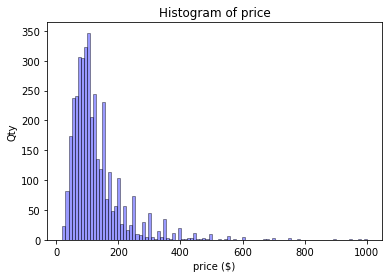

In [50]:
sns.distplot(listings['price'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of price')
plt.xlabel('price ($)')
plt.ylabel('Qty')

In [51]:
# With price prediction it is important to drop outliers in predicting parameter,
# because quantity of this data is not enough to build a good model. They would miss lead.

listings.drop(listings[listings['price'] > 400].index, inplace=True)
listings.reset_index(drop=True, inplace=True)
listings_rows = listings.shape[0]
listings.shape

(3755, 92)

In [52]:
# Drop columns with single value. They have the same value and do not affect prediction or analysis.
def drop_single_value_columns(df):
    """ Function to drop columns with single value """
    df_col = df.columns
    df_col_drop = []
    for col in df_col:
        if len(df[col].value_counts()) == 1:
            df_col_drop.append(col)
    df.drop(columns=df_col_drop, inplace=True)

drop_single_value_columns(listings)

In [53]:
# This parameters do not affect price (0 - 0.02)
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: 1 if (x == 't') else 0)
listings.is_location_exact = listings.is_location_exact.apply(lambda x: 1 if (x == 't') else 0)
listings.host_identity_verified = listings.host_identity_verified.apply(lambda x: 1 if (x == 't') else 0)

listings.instant_bookable = listings.instant_bookable.apply(lambda x: 1 if (x == 't') else 0)
listings.require_guest_profile_picture = listings.require_guest_profile_picture.apply(lambda x: 1 if (x == 't') else 0)
listings.require_guest_phone_verification = listings.require_guest_phone_verification.apply(lambda x: 1 if (x == 't') else 0)

# This parameter does not affect price (0.00)
listings.zipcode.loc[listings.zipcode == '99\n98122'] = 98122
listings.zipcode.dropna(inplace=True)
listings.zipcode = listings.zipcode.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
"""listings.loc[listings['cancellation_policy'] == 'strict', 'cancellation_policy'] = 3
listings.loc[listings['cancellation_policy'] == 'moderate', 'cancellation_policy'] = 1
listings.loc[listings['cancellation_policy'] == 'flexible', 'cancellation_policy'] = 2
listings['cancellation_policy'].astype(int, inplace=True)

listings.loc[listings['room_type'] == 'Shared room', 'room_type'] = 1
listings.loc[listings['room_type'] == 'Private room', 'room_type'] = 2
listings.loc[listings['room_type'] == 'Entire home/apt', 'room_type'] = 3
listings['room_type'].astype(int, inplace=True)

listings.loc[listings['bed_type'] == 'Airbed', 'bed_type'] = 1
listings.loc[listings['bed_type'] == 'Futon', 'bed_type'] = 2
listings.loc[listings['bed_type'] == 'Couch', 'bed_type'] = 1
listings.loc[listings['bed_type'] == 'Pull-out Sofa', 'bed_type'] = 2
listings.loc[listings['bed_type'] == 'Real Bed', 'bed_type'] = 3

listings['bed_type'].astype(int, inplace=True)
listings.shape
"""

"listings.loc[listings['cancellation_policy'] == 'strict', 'cancellation_policy'] = 3\nlistings.loc[listings['cancellation_policy'] == 'moderate', 'cancellation_policy'] = 1\nlistings.loc[listings['cancellation_policy'] == 'flexible', 'cancellation_policy'] = 2\nlistings['cancellation_policy'].astype(int, inplace=True)\n\nlistings.loc[listings['room_type'] == 'Shared room', 'room_type'] = 1\nlistings.loc[listings['room_type'] == 'Private room', 'room_type'] = 2\nlistings.loc[listings['room_type'] == 'Entire home/apt', 'room_type'] = 3\nlistings['room_type'].astype(int, inplace=True)\n\nlistings.loc[listings['bed_type'] == 'Airbed', 'bed_type'] = 1\nlistings.loc[listings['bed_type'] == 'Futon', 'bed_type'] = 2\nlistings.loc[listings['bed_type'] == 'Couch', 'bed_type'] = 1\nlistings.loc[listings['bed_type'] == 'Pull-out Sofa', 'bed_type'] = 2\nlistings.loc[listings['bed_type'] == 'Real Bed', 'bed_type'] = 3\n\nlistings['bed_type'].astype(int, inplace=True)\nlistings.shape\n"

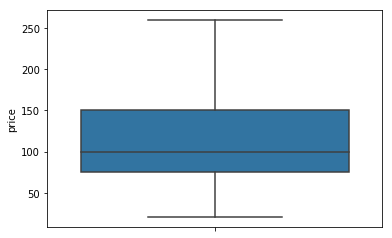

In [55]:
sns.boxplot(y='price', data=listings, showfliers=False)

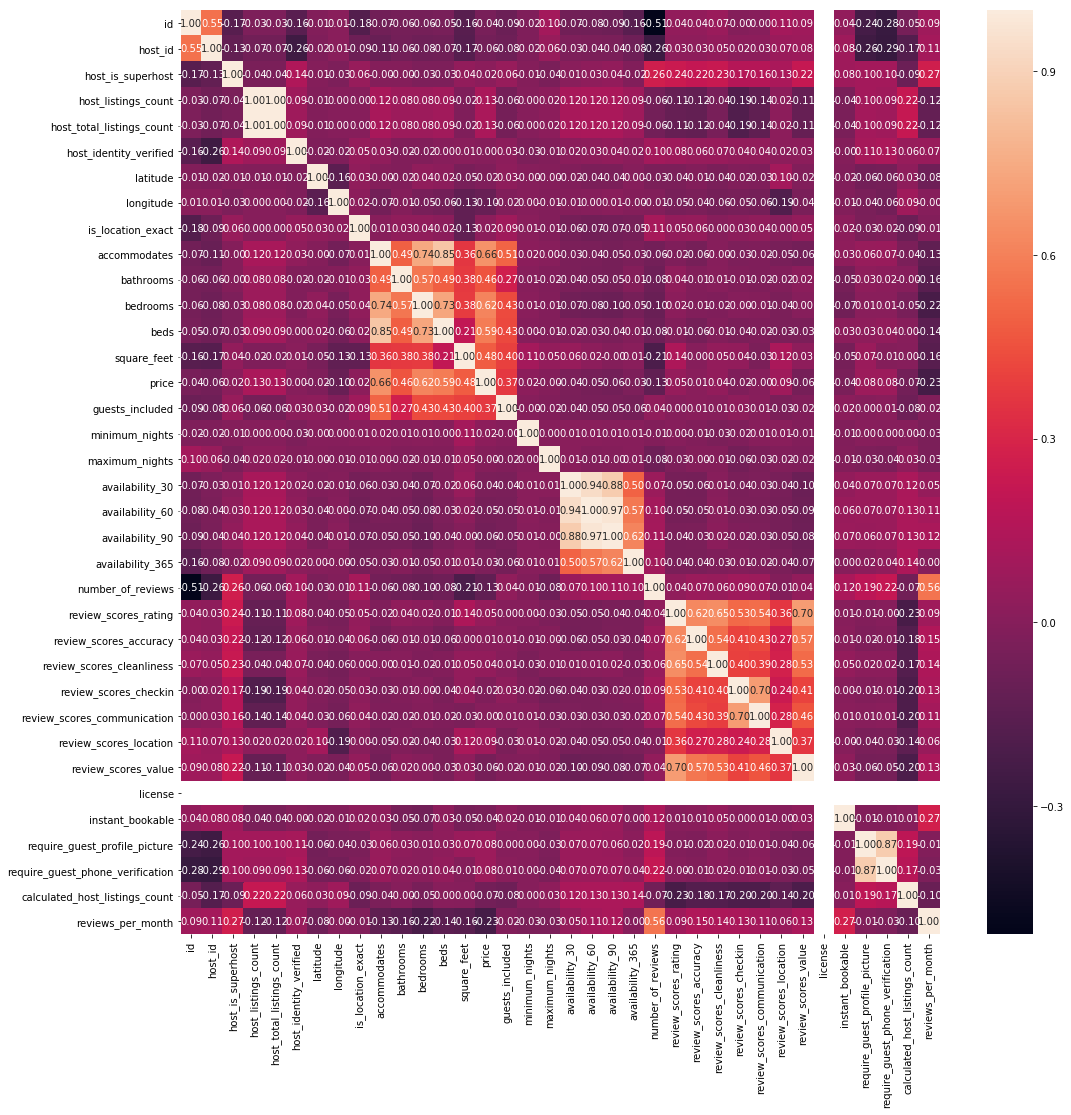

In [56]:
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(listings.corr(), annot=True, fmt=".2f");

In [57]:
listings.drop(columns=['host_listings_count', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                                  'listing_url', 'name', 'summary', 'description', 'space', 'neighborhood_overview', 'notes', 'transit',
                                  'host_thumbnail_url', 'host_picture_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'host_since', 'host_neighbourhood', 'weekly_price', 'square_feet', 'host_about',
                                  'monthly_price', 'first_review', 'last_review', 'host_url', 'host_name', 'host_location',
                                  'host_has_profile_pic', 'city', 'state', 'host_verifications', 'street', 'calendar_updated',
                                  'extra_people', 'smart_location', 'neighbourhood', 'neighbourhood_group_cleansed', 'require_guest_phone_verification',
                                  'number_of_reviews', 'reviews_per_month', 'require_guest_profile_picture', 'cleaning_fee',
                                  'security_deposit', 'host_id', 'availability_90', 'availability_60', 'review_scores_value',
                                  'availability_30', 'host_is_superhost', 'availability_365', 'host_identity_verified',
                                  'instant_bookable', 'license', 'minimum_nights', 'maximum_nights', 'calculated_host_listings_count',
                                  'review_scores_rating', 'calculated_host_listings_count', 'is_location_exact', 'review_scores_accuracy',
                                  'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_location',
                                  'host_total_listings_count', 'id', 'longitude', 'latitude', 'zipcode'
                      ], inplace=True)

I dropped above columns for the reasons:
1. Unique or very destinctive values: notes, summary, space, name, street, id, etc.
2. Properties related to host or guests
3. Similar data, I left 'neighbourhood_cleansed' and dropped others: zipcode, latitude, longitude, neighbourhood_group_cleansed, neighbourhood, zipcode.
4. Reviews, though they affect price, but new comming properties do not have any review score. So it useless for prediction.
5. Cleaning fee and security deposit also depends on price, but this parameters are not related to property itself.
6. square_feet is very important parameters, but of more than have of properties it is NaN. I could fill it with mean or zeros, but it would mislead the prediction model and analysis. Moreover, I could subsist this parameters with others like: qty of rooms or bathrooms.
5. Calendar looks attractive, but regression plot showed that it does not clearly correlate to price. The same with min-max nights.

In [58]:
# This code helps to select parameters which have the highest correlation.
# Dropping parameters with less or no correlation could positively affect prediction. But before relly on that,
# I used regression plot to see data distribution against price
c = listings.corr().abs()
s = c.unstack()
r = s.loc['price'].sort_values(ascending=False)#[10:]
r

price              1.000000
accommodates       0.661923
bedrooms           0.616286
beds               0.585837
bathrooms          0.460362
guests_included    0.371140
dtype: float64

In [59]:
# Just because above code includes all parameters, then this code returns empty set.
col_num = listings.select_dtypes(include=np.number).columns.tolist()

col_for_price = list(r.index)
listings_col_drop = set(col_num) - set(col_for_price)
listings_col_drop

set()

In [60]:
listings.drop(columns=listings_col_drop, inplace=True)

In [61]:
# I correct outliers, which looks like mistakes.
# It could mislead prediction, so I have to be careful with this changes.

listings.loc[(listings.price < 100) & (listings.beds > 5), 'beds'] = 1
listings.loc[(listings.price < 150) & (listings.bathrooms > 3), 'bathrooms'] = 1
listings.loc[(listings.price < 100) & (listings.guests_included > 5), 'guests_included'] = 1

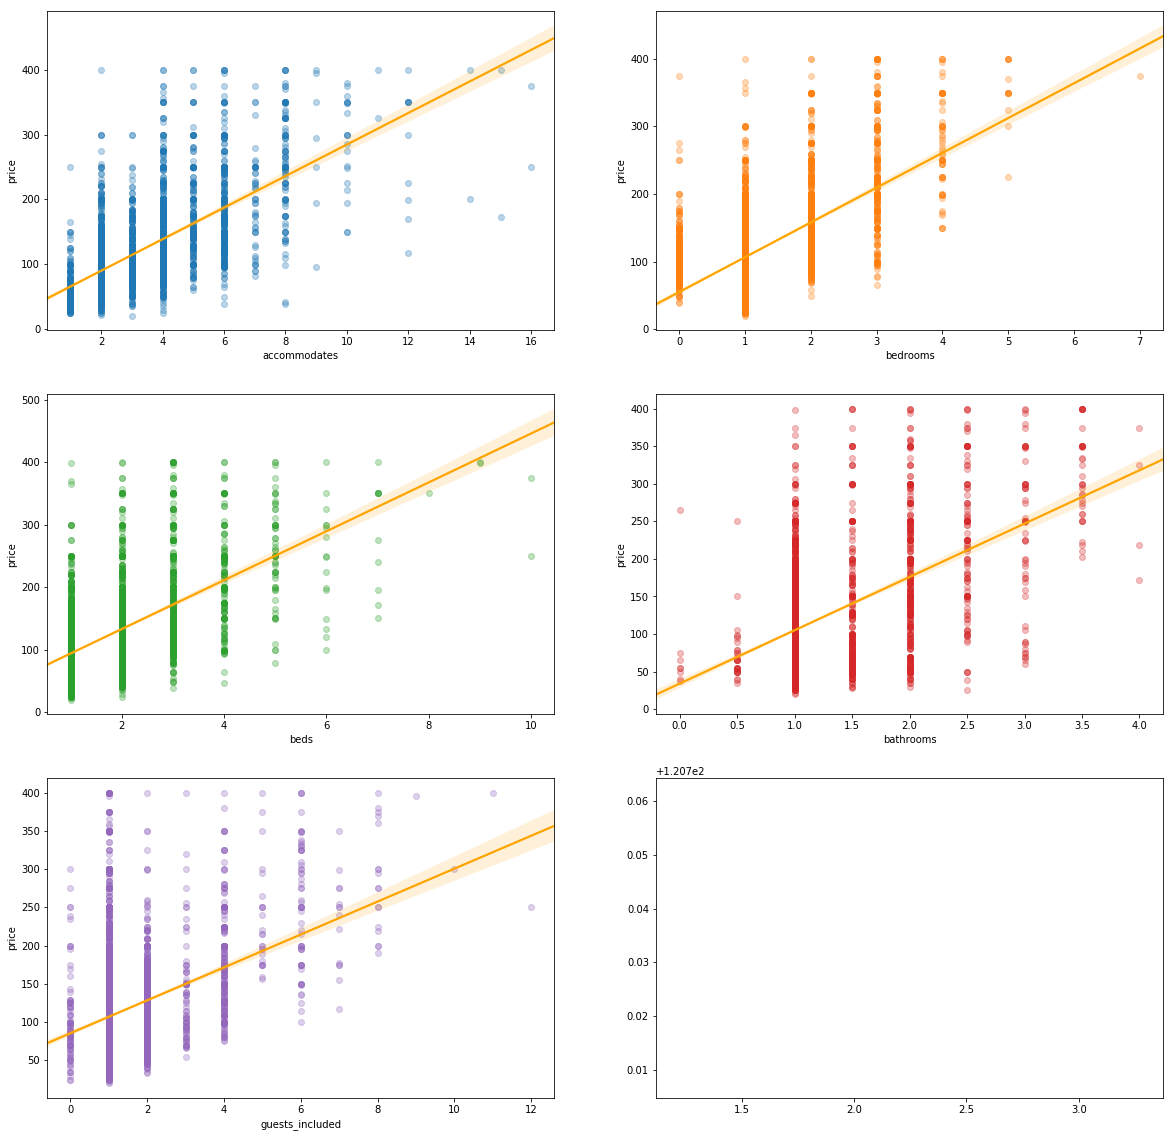

In [62]:
col = 2
rows = math.ceil(len(col_for_price) / col)

fig, ax = plt.subplots(rows, col, figsize=(20, 20))

r = 0
c = 0
for item in col_for_price[1:]: 
    sns.regplot(x=item, y='price', data=listings, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[c, r])
    r += 1
    cr = r / col
    if cr.is_integer():
        c += 1
        r = 0

I really like above regression plots, they clearly show interdependency between selected parameters and price.
As I mentioned above, I dropped others because their plots were not so good.

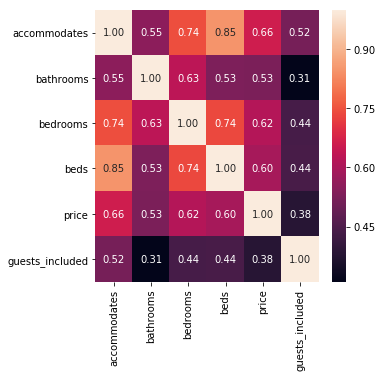

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(listings.corr(), annot=True, fmt=".2f");

In [64]:
listings_col = list(listings.columns)
listings.isna().sum()

neighbourhood_cleansed     0
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
bed_type                   0
amenities                  0
price                      0
guests_included            0
cancellation_policy        0
dtype: int64

In [65]:
# isna showed some NaNs in data. I decided to drop it, because in total it affects 23 rows or 0.006% of dataset.
# It would take time for me to set values based on my analysis. I would not recommend put there zeros or mean, because
# it would mislead prediction and analysis.
# Dropping rows should not impact analysis and predition.

listings.dropna(inplace=True)
print('I dropped here {} rows with NaNs'.format(listings_rows - listings.shape[0]))
listings.shape

I dropped here 23 rows with NaNs


(3732, 12)

In [66]:
listings_col.remove('price')

In [67]:
# I dropped here property types that have very little presence in dataset. It useless to build model on this tiny data.
# Anyway, my model would not predict this properties correctly. Dropping this data later improved test score upto 2-3%

property_type_counts = listings.property_type.value_counts()

for index, count in property_type_counts.items():
    if count < 100:
        listings.drop(listings[listings['property_type'] == index].index, inplace=True)
        print(index)

Condominium
Loft
Bed & Breakfast
Cabin
Other
Bungalow
Camper/RV
Boat
Tent
Treehouse
Dorm
Chalet
Yurt


# Section 4: Modeling

### Q1: What is the price should I set for my property?

In [68]:
# I identified categorical properties in order to convert them to get_dummies
col_num = listings.select_dtypes(include=np.number).columns.tolist()
col_str = list(listings.columns)

for col in listings.columns:
    if col in col_num:
          col_str.remove(col)

In [69]:
y = listings.price
X = listings.drop(columns=['price', 'amenities'])

col_str.remove('amenities')

X = pd.get_dummies(data=X, columns=col_str, drop_first=True)

X_norm = scale(X)

In [70]:
random_state = random.randint(0, 50) # I set random state as variable in order to sync two models accuracy

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.30, random_state=random_state)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_pred))

0.64565266429
0.628389790686


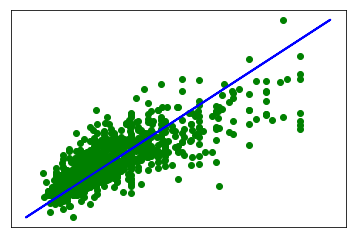

In [71]:
plt.scatter(y_test, y_pred,  color='green')
plt.plot(y_pred, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

### Q2.1: What kind of amenities shall I include in my property?

In [72]:
# render column amenities to separate columns in order to improve predict precision
amenities = set()
listings.reset_index(drop=True, inplace=True)

for row in range(0, listings.shape[0]):
    amenities_row = list(listings['amenities'][row].strip('{}').split(','))
    for item in amenities_row:
        amenities.add(item)

for item in amenities:
    listings[item] = 0
    listings.loc[listings.amenities.map(set(item).issubset), item] = 1

listings.drop(columns='')
amenities_vs_price = listings  #I create another dataset for another question

amenities_correlation = listings

amenities.remove('')
    
listings.describe()

accommodates    bathrooms     bedrooms         beds        price  \
count   3482.000000  3482.000000  3482.000000  3482.000000  3482.000000   
mean       3.305859     1.228461     1.292935     1.701034   120.853245   
std        1.895372     0.512837     0.837433     1.064398    69.160132   
min        1.000000     0.000000     0.000000     1.000000    20.000000   
25%        2.000000     1.000000     1.000000     1.000000    75.000000   
50%        3.000000     1.000000     1.000000     1.000000   100.000000   
75%        4.000000     1.000000     2.000000     2.000000   150.000000   
max       16.000000     4.000000     7.000000    10.000000   400.000000   

       guests_included  "24-Hour Check-in"          "Family/Kid Friendly"  \
count      3482.000000         3482.000000  3482.0            3482.000000   
mean          1.654509            0.159104     1.0               0.555428   
std           1.245431            0.365826     0.0               0.496990   
min           0.000000            0.000000     1.0               0.000000   
25%           1.000000            0.000000     1.0               0.000000   
50%           1.000000            0.000000     1.0               1.000000   
75%           2.000000            0.000000     1.0               1.000000   
max          12.000000            1.000000     1.0               1.000000   

       "Fire Extinguisher"     ...           Doorman  "Suitable for Events"  \
count          3482.000000     ...       3482.000000            3482.000000   
mean              0.643308     ...          0.956347               0.141011   
std               0.479091     ...          0.204351               0.348083   
min               0.000000     ...          0.000000               0.000000   
25%               0.000000     ...          1.000000               0.000000   
50%               1.000000     ...          1.000000               0.000000   
75%               1.000000     ...          1.000000               0.000000   
max               1.000000     ...          1.000000               1.000000   

       "Air Conditioning"         Iron  "Pets Allowed"  "Washer / Dryer"  \
count         3482.000000  3482.000000     3482.000000       3482.000000   
mean             0.555428     0.964963        0.131246          0.568926   
std              0.496990     0.183901        0.337718          0.495298   
min              0.000000     0.000000        0.000000          0.000000   
25%              0.000000     1.000000        0.000000          0.000000   
50%              1.000000     1.000000        0.000000          1.000000   
75%              1.000000     1.000000        0.000000          1.000000   
max              1.000000     1.000000        1.000000          1.000000   

           Heating    "Hot Tub"   "Cable TV"        Dryer  
count  3482.000000  3482.000000  3482.000000  3482.000000  
mean      0.958932     0.513211     0.618897     0.918150  
std       0.198477     0.499897     0.485728     0.274175  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     0.000000     1.000000  
50%       1.000000     1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000  

[8 rows x 48 columns]

In [73]:
listings = listings.drop(columns='amenities')
listings_col.remove('amenities')

In [74]:
"""
amenities_correlation = amenities_correlation.loc[amenities_correlation.room_type == 3]
amenities_correlation = amenities_correlation.loc[amenities_correlation.neighbourhood_group_cleansed == 'Downtown']
amenities_correlation = amenities_correlation.loc[amenities_correlation.property_type == 'Apartment']
amenities_correlation = amenities_correlation.loc[amenities_correlation.cancellation_policy == 1]
"""

amenities_correlation = amenities_correlation.drop(columns=listings_col)
amenities_correlation = amenities_correlation.drop(columns='')
amenities_correlation.describe()

price  "24-Hour Check-in"  "Family/Kid Friendly"  \
count  3482.000000         3482.000000            3482.000000   
mean    120.853245            0.159104               0.555428   
std      69.160132            0.365826               0.496990   
min      20.000000            0.000000               0.000000   
25%      75.000000            0.000000               0.000000   
50%     100.000000            0.000000               1.000000   
75%     150.000000            0.000000               1.000000   
max     400.000000            1.000000               1.000000   

       "Fire Extinguisher"       Cat(s)  "Pets live on this property"  \
count          3482.000000  3482.000000                   3482.000000   
mean              0.643308     0.185238                      0.308443   
std               0.479091     0.388547                      0.461917   
min               0.000000     0.000000                      0.000000   
25%               0.000000     0.000000                      0.000000   
50%               1.000000     0.000000                      0.000000   
75%               1.000000     0.000000                      1.000000   
max               1.000000     1.000000                      1.000000   

           Kitchen  "Elevator in Building"  "Smoke Detector"      Shampoo  \
count  3482.000000             3482.000000       3482.000000  3482.000000   
mean      0.957209                0.226307          0.897473     0.792361   
std       0.202416                0.418500          0.303384     0.405675   
min       0.000000                0.000000          0.000000     0.000000   
25%       1.000000                0.000000          1.000000     1.000000   
50%       1.000000                0.000000          1.000000     1.000000   
75%       1.000000                0.000000          1.000000     1.000000   
max       1.000000                1.000000          1.000000     1.000000   

          ...           Doorman  "Suitable for Events"  "Air Conditioning"  \
count     ...       3482.000000            3482.000000         3482.000000   
mean      ...          0.956347               0.141011            0.555428   
std       ...          0.204351               0.348083            0.496990   
min       ...          0.000000               0.000000            0.000000   
25%       ...          1.000000               0.000000            0.000000   
50%       ...          1.000000               0.000000            1.000000   
75%       ...          1.000000               0.000000            1.000000   
max       ...          1.000000               1.000000            1.000000   

              Iron  "Pets Allowed"  "Washer / Dryer"      Heating  \
count  3482.000000     3482.000000       3482.000000  3482.000000   
mean      0.964963        0.131246          0.568926     0.958932   
std       0.183901        0.337718          0.495298     0.198477   
min       0.000000        0.000000          0.000000     0.000000   
25%       1.000000        0.000000          0.000000     1.000000   
50%       1.000000        0.000000          1.000000     1.000000   
75%       1.000000        0.000000          1.000000     1.000000   
max       1.000000        1.000000          1.000000     1.000000   

         "Hot Tub"   "Cable TV"        Dryer  
count  3482.000000  3482.000000  3482.000000  
mean      0.513211     0.618897     0.918150  
std       0.499897     0.485728     0.274175  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 42 columns]

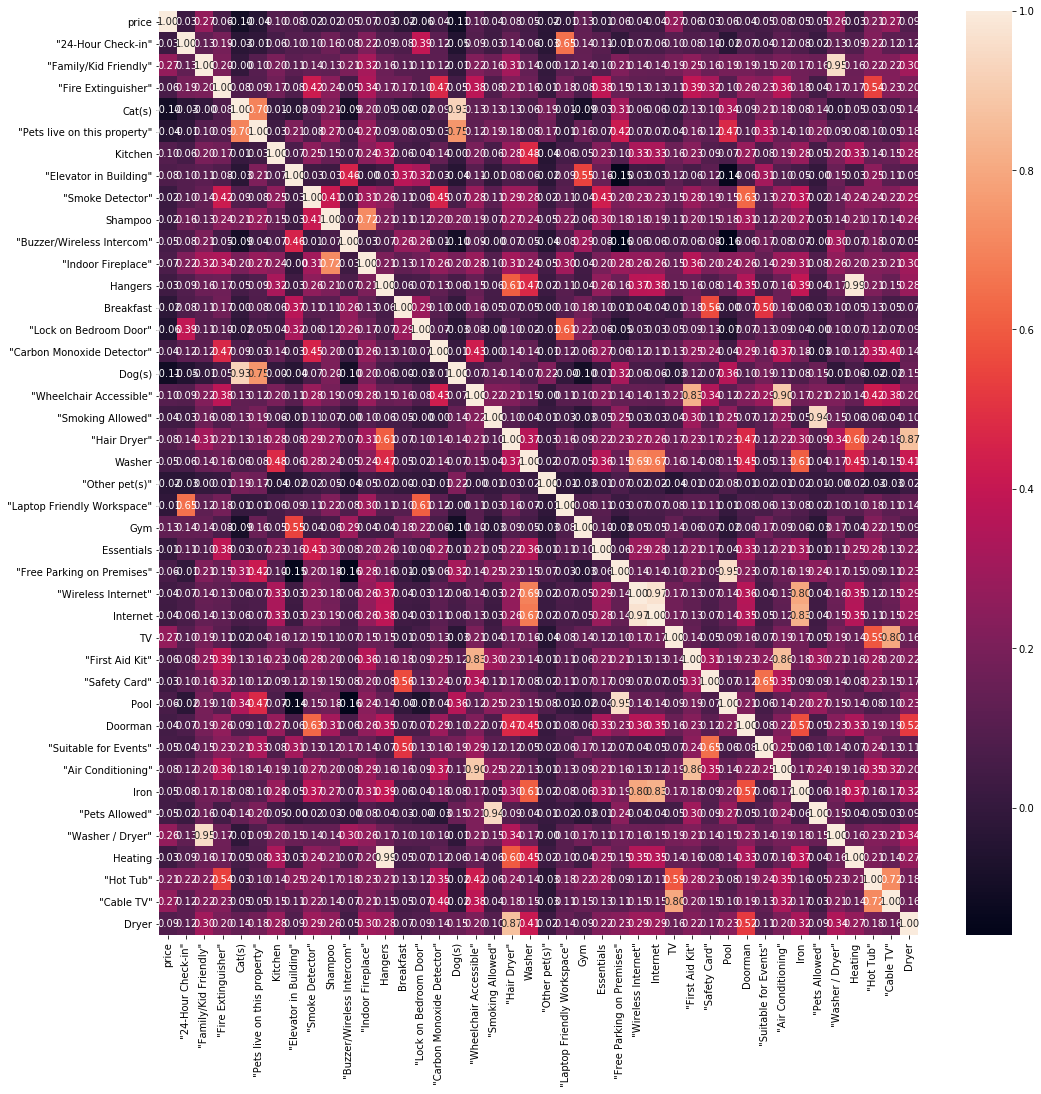

In [75]:
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(amenities_correlation.corr(), annot=True, fmt=".2f");

Some amenities clearly corelates to each other. For example pool and Hair Drier or Internet and Iron

###  Q2.2 How amenities affect price?

In [76]:
# based on my analysis in plot below, I decided to drop this columns with NO CORRELATION to price. It improved the score
amenities_correlation = amenities_correlation.drop(columns=['"Air Conditioning"', '"Wheelchair Accessible"', '"Pets live on this property"'
                                   ,'"Safety Card"', '"Elevator in Building"', 'Gym', '"First Aid Kit"', '"24-Hour Check-in"'
                                   ])

# based on my analysis in plot below, I decided to drop this columns with MEDIUM CORRELATION to price. It improved the score
amenities_correlation = amenities_correlation.drop(columns=['"Hot Tub"', '"Suitable for Events"', '"Carbon Monoxide Detector"', '"Smoking Allowed"'
                                   ,'Shampoo', 'Essentials', '"Smoke Detector"', 'Breakfast', '"Fire Extinguisher"'
                                   ,'"Laptop Friendly Workspace"', '"Indoor Fireplace"', '"Washer / Dryer"', '"Family/Kid Friendly"'
                                   ,'"Pets Allowed"', 'Pool', '"Free Parking on Premises"', '"Buzzer/Wireless Intercom"'
                                    ,'"Cable TV"', 'TV', 'Dog(s)', 'Cat(s)', '"Hair Dryer"', '"Lock on Bedroom Door"'
                                   ])

In [77]:
c = amenities_correlation.corr().abs()
s = c.unstack()
r = s.loc['price'].sort_values(ascending=False)#[7:]

In [78]:
amenities_for_price = list(r.index)
amenities_for_price

['price',
 'Kitchen',
 'Dryer',
 'Iron',
 'Washer',
 'Doorman',
 '"Wireless Internet"',
 'Internet',
 'Hangers',
 'Heating',
 '"Other pet(s)"']

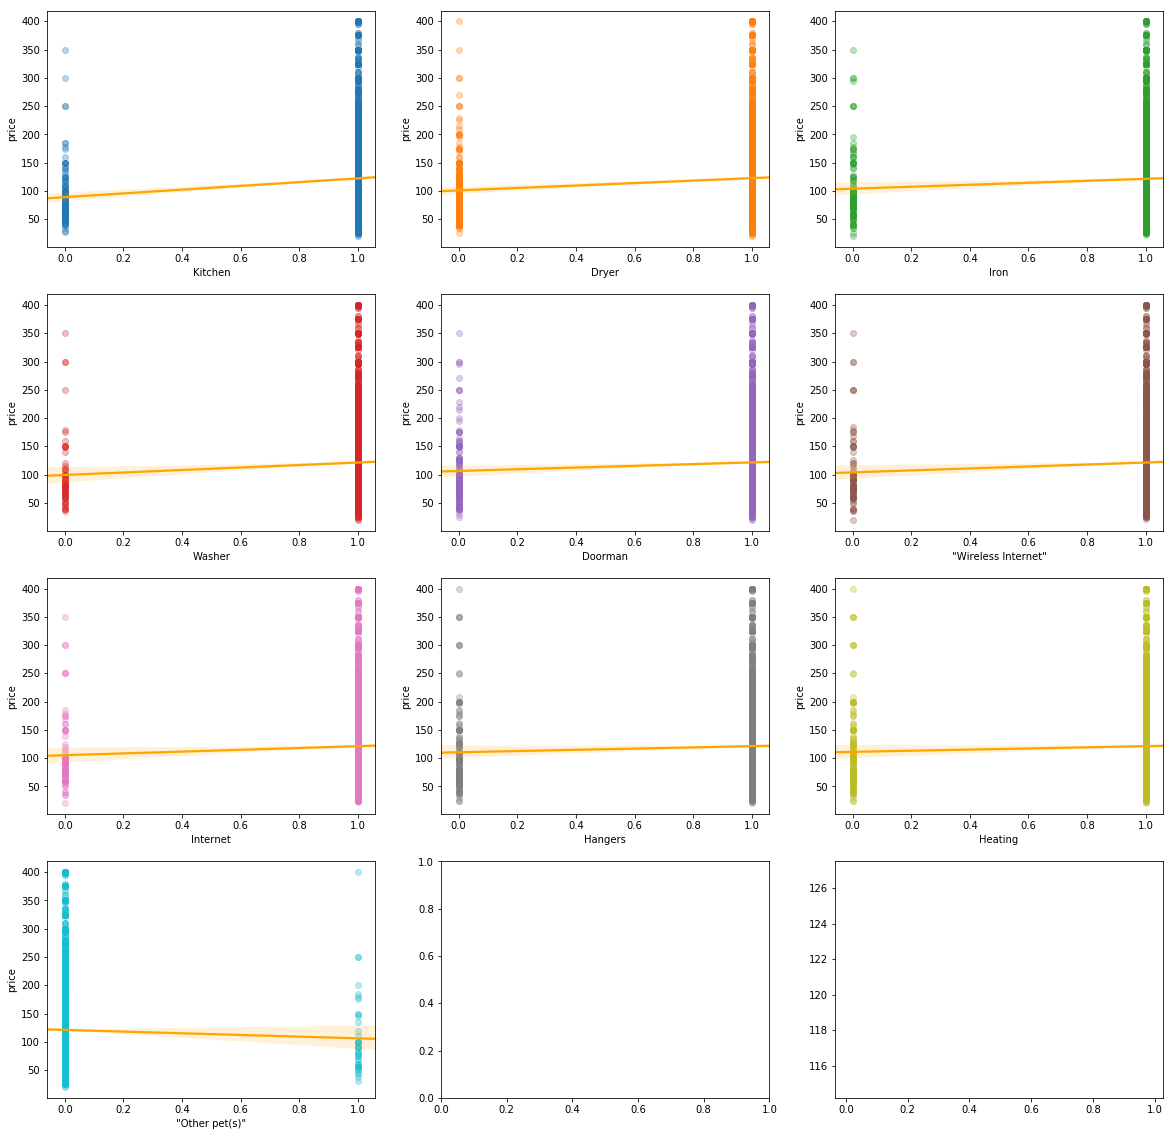

In [79]:
col = 3
rows = math.ceil(len(amenities_for_price) / col)

fig, ax = plt.subplots(rows, col, figsize=(20, 20))

r = 0
c = 0
for item in amenities_for_price[1:]: 
    sns.regplot(x=item, y='price', data=listings, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[c, r])
    r += 1
    cr = r / col
    if cr.is_integer():
        c += 1
        r = 0

In [80]:
amenities_col_drop = set(amenities) - set(amenities_for_price)

In [81]:
listings.shape

(3482, 53)

In [82]:
y = listings.price
X = listings.drop(columns=['price'])
X.drop(columns=amenities_col_drop, inplace=True)

In [83]:
X = pd.get_dummies(data=X, columns=col_str, drop_first=True)

In [84]:
X_norm = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.30, random_state=random_state)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_pred))

0.646819318432
0.625941543666


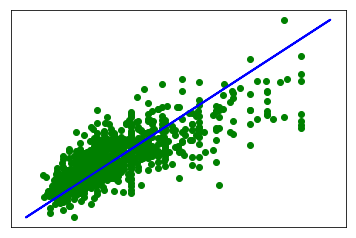

In [85]:
plt.scatter(y_test, y_pred,  color='green')
plt.plot(y_pred, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

I have added amenities that look the most interesting for modeling, but they did not improve score. Actually, the score decreased slightly.

In [86]:
"""#According to EmploymentStatus, which group has the highest average job satisfaction?

df2 = pd.DataFrame(columns=['min', 'max', 'mean', 'std'])

amenities = set(amenities_vs_price)

for item in amenities:
    df2.loc[item, 'min'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].min()
    df2.loc[item, 'max'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].max()
    df2.loc[item, 'mean'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].mean()
    df2.loc[item, 'std'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].std()

print('The most expensive amenities based on STD price: ',list(df2.sort_values(by=['std'], ascending=False).index[0:5]))
"""
listings.shape

(3482, 53)

### Q3: How cleaning fee depends on object size and price?

In [87]:
listings3 = pd.read_csv("listings.csv")

listings3.price = listings3.price[listings3.price.notna()].str.replace(',', '').str.replace('$', '').astype(float)

listings3.cleaning_fee = listings3.cleaning_fee[listings3.cleaning_fee.notna()].str.replace('$', '').astype(float)
listings3.cleaning_fee = listings3.cleaning_fee.fillna(listings3.cleaning_fee[listings3.cleaning_fee.notna()].std())
"""
listings3.security_deposit = listings3.security_deposit[listings3.security_deposit.notna()].str.replace(',', '').str.replace('$', '').astype(float)
listings3.security_deposit = listings3.security_deposit.fillna(listings3.security_deposit[listings3.security_deposit.notna()].std())
"""

"\nlistings3.security_deposit = listings3.security_deposit[listings3.security_deposit.notna()].str.replace(',', '').str.replace('$', '').astype(float)\nlistings3.security_deposit = listings3.security_deposit.fillna(listings3.security_deposit[listings3.security_deposit.notna()].std())\n"

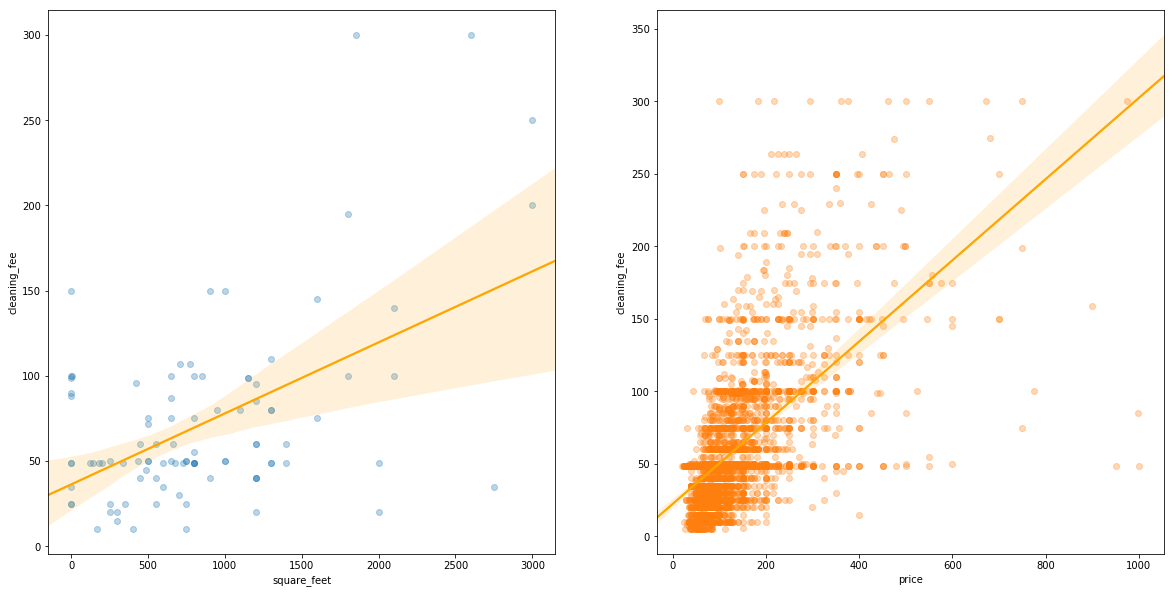

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.regplot(x='square_feet', y='cleaning_fee', data=listings3, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[0])
sns.regplot(x='price', y='cleaning_fee', data=listings3, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[1])

The plots show that cleaning_fee does not strongly depend on size or price. But there are still corelation is presented and as much your property expensive, the higher should be cleaning fee.